# Titanic Data Set Classifier

## Load and Analyzed the data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_data = pd.read_csv('./data/titanic/data/train.csv')
test_data = pd.read_csv('./data/titanic/data/test.csv')

In [3]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Data Cleaning

### Fill null value

In [7]:
import random
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
train_data['Embarked'].fillna(random.choice(['S', 'C', 'Q']), inplace=True)

In [8]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [10]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

### Encode Categorical value using onehot encoder

In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

def encoder(data):
    values = np.array(data)
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    # invert first example
    print(len(onehot_encoded))
    index = [data.name+'_'+str(label_encoder.inverse_transform([i])[0]) for i in range(len(onehot_encoded[0]))]
    return pd.DataFrame(onehot_encoded, columns = index)

In [12]:
train = train_data.join([encoder(train_data['Sex']), encoder(train_data['Embarked'])])
test = test_data.join([encoder(test_data['Sex']), encoder(test_data['Embarked'])])

891
891
418
418


### Drop Unecessary Value

In [13]:
train_label = train['Survived'].copy()

In [14]:
train.drop(columns=['Sex', 'Embarked','Name', 'Ticket','Cabin', 'Survived', 'PassengerId'], inplace=True)
test.drop(columns=['Sex', 'Embarked','Name', 'Ticket','Cabin', 'PassengerId'], inplace=True)

In [15]:
train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0.0,1.0,0.0,0.0,1.0
1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
2,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0
3,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
4,3,35.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0
887,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0
888,3,28.0,1,2,23.4500,1.0,0.0,0.0,0.0,1.0
889,1,26.0,0,0,30.0000,0.0,1.0,1.0,0.0,0.0


In [16]:
test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,0,0,7.8292,0.0,1.0,0.0,1.0,0.0
1,3,47.0,1,0,7.0000,1.0,0.0,0.0,0.0,1.0
2,2,62.0,0,0,9.6875,0.0,1.0,0.0,1.0,0.0
3,3,27.0,0,0,8.6625,0.0,1.0,0.0,0.0,1.0
4,3,22.0,1,1,12.2875,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
413,3,27.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0
414,1,39.0,0,0,108.9000,1.0,0.0,1.0,0.0,0.0
415,3,38.5,0,0,7.2500,0.0,1.0,0.0,0.0,1.0
416,3,27.0,0,0,8.0500,0.0,1.0,0.0,0.0,1.0


In [17]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
train = scaler.fit_transform(train)
test = scaler.fit_transform(test)

## Construct Neural Network Model

In [18]:
import torch as T
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F


class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,1)
        self.dropout = nn.Dropout(0.2)
        
        # Initialize Weight
        fc1 = 1.0/np.sqrt(self.fc1.weight.data.size()[0])
        fc2 = 1.0/np.sqrt(self.fc2.weight.data.size()[0])
        fc3 = 1.0/np.sqrt(self.fc3.weight.data.size()[0])
        fc4 = 1.0/np.sqrt(self.fc4.weight.data.size()[0])
        fc5 = 1.0/np.sqrt(self.fc4.weight.data.size()[0])

        T.nn.init.uniform_(self.fc1.weight.data, -fc1,fc1)
        T.nn.init.uniform_(self.fc1.bias.data, -fc1,fc1)
        T.nn.init.uniform_(self.fc2.weight.data,-fc2,fc2)
        T.nn.init.uniform_(self.fc2.bias.data, -fc2,fc2)
        T.nn.init.uniform_(self.fc3.weight.data,-fc3,fc3)
        T.nn.init.uniform_(self.fc3.bias.data, -fc3,fc3)
        T.nn.init.uniform_(self.fc4.weight.data,-fc4,fc4)
        T.nn.init.uniform_(self.fc4.bias.data, -fc4,fc4)
        T.nn.init.uniform_(self.fc4.weight.data,-fc5,fc5)
        T.nn.init.uniform_(self.fc4.bias.data, -fc5,fc5)
        
        
    def forward(self, x):
        x = F.tanh(self.fc1(x))
        x = self.dropout(x)
        x = F.tanh(self.fc2(x))
        x = self.dropout(x)
        x = F.tanh(self.fc3(x))
        x = self.dropout(x)
        x = F.tanh(self.fc4(x))
        x = self.dropout(x)
        x = T.sigmoid(self.fc5(x))
        return x
    
net = Model()

In [19]:
loss_func = nn.BCELoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

## Training Phase

### Separate Data into Train and Test Set

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, train_label.to_numpy(), test_size=0.15, random_state=42)

In [21]:
dataloaders = T.utils.data.DataLoader(T.tensor(X_train, dtype=T.float), batch_size=8)

dataloaders_labels = T.utils.data.DataLoader(T.tensor(y_train, dtype=T.float), batch_size=8)

### Train Model

In [22]:
from tqdm import tqdm
net.train()
for epoch in tqdm(range(5)):  # loop over the dataset multiple times
    x = zip(dataloaders, dataloaders_labels)
    for i, data in enumerate(x, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = net(inputs)
        loss = loss_func(outputs.reshape(-1), labels)
        loss.backward()
        optimizer.step()
        print('epoch: {}, batch: {}, loss: {}'.format(epoch, i,loss.item()))

print('Finished Training')

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\Users\fazam\AppData\Local\Continuum\anaconda3\envs\test\lib\site-packages\torch\nn\functional.py:1628: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


epoch: 0, batch: 0, loss: 0.6836316585540771
epoch: 0, batch: 1, loss: 0.6624957919120789
epoch: 0, batch: 2, loss: 0.670433759689331
epoch: 0, batch: 3, loss: 0.6641169190406799
epoch: 0, batch: 4, loss: 0.7004317045211792
epoch: 0, batch: 5, loss: 0.6419076919555664
epoch: 0, batch: 6, loss: 0.6531413793563843
epoch: 0, batch: 7, loss: 0.7086383700370789
epoch: 0, batch: 8, loss: 0.7069631218910217
epoch: 0, batch: 9, loss: 0.6280568242073059
epoch: 0, batch: 10, loss: 0.6303493976593018
epoch: 0, batch: 11, loss: 0.7110439538955688
epoch: 0, batch: 12, loss: 0.7298489809036255
epoch: 0, batch: 13, loss: 0.567550003528595
epoch: 0, batch: 14, loss: 0.5812172889709473
epoch: 0, batch: 15, loss: 0.7577140927314758
epoch: 0, batch: 16, loss: 0.6828562021255493
epoch: 0, batch: 17, loss: 0.5459192395210266
epoch: 0, batch: 18, loss: 0.5541039705276489
epoch: 0, batch: 19, loss: 0.7146664261817932
epoch: 0, batch: 20, loss: 0.5658259391784668
epoch: 0, batch: 21, loss: 0.6266427636146545


 20%|████████████████▊                                                                   | 1/5 [00:00<00:02,  1.69it/s]


epoch: 0, batch: 81, loss: 0.524482786655426
epoch: 0, batch: 82, loss: 0.7036079168319702
epoch: 0, batch: 83, loss: 0.47586092352867126
epoch: 0, batch: 84, loss: 0.3760167062282562
epoch: 0, batch: 85, loss: 0.37571001052856445
epoch: 0, batch: 86, loss: 0.3385184407234192
epoch: 0, batch: 87, loss: 0.32231056690216064
epoch: 0, batch: 88, loss: 0.4377186596393585
epoch: 0, batch: 89, loss: 0.6569088697433472
epoch: 0, batch: 90, loss: 0.45622068643569946
epoch: 0, batch: 91, loss: 0.24707777798175812
epoch: 0, batch: 92, loss: 0.273571252822876
epoch: 0, batch: 93, loss: 0.28715887665748596
epoch: 0, batch: 94, loss: 0.2828517556190491
epoch: 1, batch: 0, loss: 0.4642080068588257
epoch: 1, batch: 1, loss: 0.2663455009460449
epoch: 1, batch: 2, loss: 0.4835817217826843
epoch: 1, batch: 3, loss: 0.5226461887359619
epoch: 1, batch: 4, loss: 0.699284017086029
epoch: 1, batch: 5, loss: 0.27739375829696655
epoch: 1, batch: 6, loss: 0.513188362121582
epoch: 1, batch: 7, loss: 0.474096238

 40%|█████████████████████████████████▌                                                  | 2/5 [00:01<00:01,  1.83it/s]

epoch: 1, batch: 66, loss: 0.1717934012413025
epoch: 1, batch: 67, loss: 0.7962445020675659
epoch: 1, batch: 68, loss: 0.39736419916152954
epoch: 1, batch: 69, loss: 0.5337309837341309
epoch: 1, batch: 70, loss: 0.4261021912097931
epoch: 1, batch: 71, loss: 0.5045245885848999
epoch: 1, batch: 72, loss: 0.46136513352394104
epoch: 1, batch: 73, loss: 0.35054028034210205
epoch: 1, batch: 74, loss: 0.9571179747581482
epoch: 1, batch: 75, loss: 0.6727907061576843
epoch: 1, batch: 76, loss: 0.3462858200073242
epoch: 1, batch: 77, loss: 0.43347403407096863
epoch: 1, batch: 78, loss: 0.3944711983203888
epoch: 1, batch: 79, loss: 0.888940691947937
epoch: 1, batch: 80, loss: 0.4981154203414917
epoch: 1, batch: 81, loss: 0.4031513035297394
epoch: 1, batch: 82, loss: 0.6363781094551086
epoch: 1, batch: 83, loss: 0.5033978223800659
epoch: 1, batch: 84, loss: 0.32028287649154663
epoch: 1, batch: 85, loss: 0.34460780024528503
epoch: 1, batch: 86, loss: 0.3540933132171631
epoch: 1, batch: 87, loss: 0.

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:01,  1.92it/s]

epoch: 2, batch: 88, loss: 0.3844414949417114
epoch: 2, batch: 89, loss: 0.6522157788276672
epoch: 2, batch: 90, loss: 0.46803200244903564
epoch: 2, batch: 91, loss: 0.18371917307376862
epoch: 2, batch: 92, loss: 0.1939394772052765
epoch: 2, batch: 93, loss: 0.19617725908756256
epoch: 2, batch: 94, loss: 0.4257895350456238
epoch: 3, batch: 0, loss: 0.409322053194046
epoch: 3, batch: 1, loss: 0.285148561000824
epoch: 3, batch: 2, loss: 0.44326600432395935
epoch: 3, batch: 3, loss: 0.44935736060142517
epoch: 3, batch: 4, loss: 0.5300917625427246
epoch: 3, batch: 5, loss: 0.3988705277442932
epoch: 3, batch: 6, loss: 0.4466787874698639
epoch: 3, batch: 7, loss: 0.5166457891464233
epoch: 3, batch: 8, loss: 0.629440188407898
epoch: 3, batch: 9, loss: 0.38573336601257324
epoch: 3, batch: 10, loss: 0.5981277823448181
epoch: 3, batch: 11, loss: 0.4113575220108032
epoch: 3, batch: 12, loss: 0.2899385988712311
epoch: 3, batch: 13, loss: 0.25616225600242615
epoch: 3, batch: 14, loss: 0.30860182642

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:01<00:00,  2.03it/s]

epoch: 3, batch: 77, loss: 0.4266011118888855
epoch: 3, batch: 78, loss: 0.5381742715835571
epoch: 3, batch: 79, loss: 0.895397961139679
epoch: 3, batch: 80, loss: 0.4323129653930664
epoch: 3, batch: 81, loss: 0.42552149295806885
epoch: 3, batch: 82, loss: 0.6496745944023132
epoch: 3, batch: 83, loss: 0.5433564782142639
epoch: 3, batch: 84, loss: 0.3168654441833496
epoch: 3, batch: 85, loss: 0.37516137957572937
epoch: 3, batch: 86, loss: 0.34558621048927307
epoch: 3, batch: 87, loss: 0.2705315053462982
epoch: 3, batch: 88, loss: 0.4046466052532196
epoch: 3, batch: 89, loss: 0.5238522291183472
epoch: 3, batch: 90, loss: 0.4467397630214691
epoch: 3, batch: 91, loss: 0.18920917809009552
epoch: 3, batch: 92, loss: 0.1991148591041565
epoch: 3, batch: 93, loss: 0.29486140608787537
epoch: 3, batch: 94, loss: 0.2828098237514496
epoch: 4, batch: 0, loss: 0.4957461953163147
epoch: 4, batch: 1, loss: 0.2492605596780777
epoch: 4, batch: 2, loss: 0.3963965177536011
epoch: 4, batch: 3, loss: 0.45602

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.14it/s]

epoch: 4, batch: 66, loss: 0.19488686323165894
epoch: 4, batch: 67, loss: 0.739589273929596
epoch: 4, batch: 68, loss: 0.39600467681884766
epoch: 4, batch: 69, loss: 0.6180241703987122
epoch: 4, batch: 70, loss: 0.31226176023483276
epoch: 4, batch: 71, loss: 0.44422945380210876
epoch: 4, batch: 72, loss: 0.4762866199016571
epoch: 4, batch: 73, loss: 0.4038222134113312
epoch: 4, batch: 74, loss: 0.949341893196106
epoch: 4, batch: 75, loss: 0.6039568781852722
epoch: 4, batch: 76, loss: 0.3565700352191925
epoch: 4, batch: 77, loss: 0.4166505038738251
epoch: 4, batch: 78, loss: 0.5036121010780334
epoch: 4, batch: 79, loss: 0.9649756550788879
epoch: 4, batch: 80, loss: 0.46363410353660583
epoch: 4, batch: 81, loss: 0.45138752460479736
epoch: 4, batch: 82, loss: 0.606659471988678
epoch: 4, batch: 83, loss: 0.5469424724578857
epoch: 4, batch: 84, loss: 0.31533247232437134
epoch: 4, batch: 85, loss: 0.40070974826812744
epoch: 4, batch: 86, loss: 0.3850814402103424
epoch: 4, batch: 87, loss: 0.

### Cross Validate Model

In [23]:
cv_data = T.utils.data.DataLoader(T.tensor(X_test, dtype=T.float))

cv_labels = T.utils.data.DataLoader(T.tensor(y_test, dtype=T.float))

In [24]:
y = zip(cv_data,cv_labels)
correct = 0
total = 0
with T.no_grad():
    for i, data in enumerate(y, 0):
        inputs, labels = data
        outputs = net(inputs)
        y_pred = T.tensor(outputs[0][0]>=T.tensor(0.5), dtype=T.float)
        total+=1
        if y_pred==labels:
            correct+=1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 81 %


<ipython-input-24-4d74fbdee87e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = T.tensor(outputs[0][0]>=T.tensor(0.5), dtype=T.float)


#### Save Model (if needed) 

In [25]:
PATH = './titanic_net.pth'
T.save(net.state_dict(), PATH)

### Predict Test Data

In [26]:
test_loader = T.utils.data.DataLoader(T.tensor(test, dtype=T.float))

In [27]:
result=[]
with T.no_grad():
    for i, data in enumerate(test_loader, 0):
        inputs = data
        outputs = net(inputs)
        y_pred = T.tensor(outputs[0][0]>=T.tensor(0.5), dtype=T.float)
        result.append(int(y_pred))

<ipython-input-27-c5b6fdc173b4>:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_pred = T.tensor(outputs[0][0]>=T.tensor(0.5), dtype=T.float)


In [28]:
submission = pd.read_csv('./data/titanic/data/submission.csv')

In [29]:
submission['Survived'] = result

In [30]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [31]:
submission.to_csv('submission.csv', index=False)

## Analyze Data

In [32]:
test_data['Survived']=result
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,NaN,S,0


In [34]:
len(test_data[(test_data['Sex']=='female') & (test_data['Survived']==1)])

135

In [33]:
len(test_data[(test_data['Age']<18) & (test_data['Survived']==1)])

15

In [35]:
len(test_data[(test_data['SibSp']==0) & (test_data['Parch']==0) & (test_data['Survived']==1)])

68

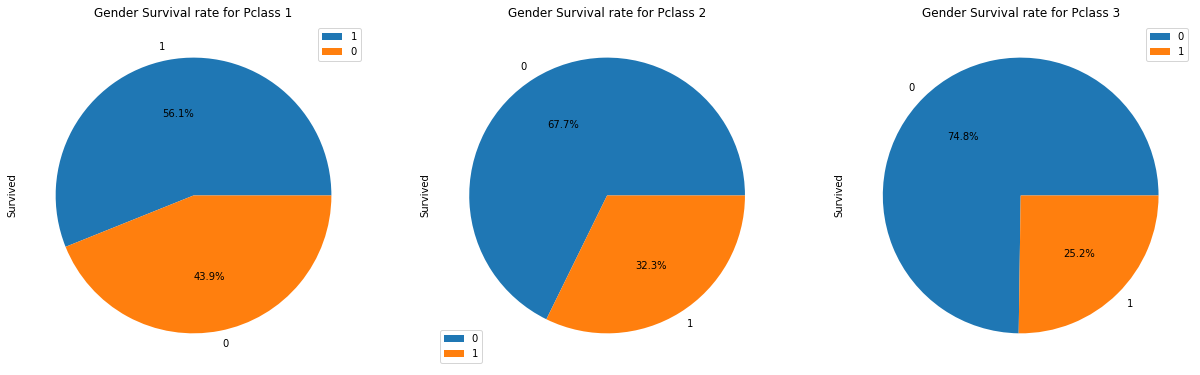

In [36]:
df = test_data[['Pclass', 'Survived']]
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
targets = [1,2,3]

for i in range(len(ax)):
    temp = ax[i]
    pclass = targets[i]
    df[df['Pclass'] == pclass]['Survived'].value_counts().plot(kind='pie', ax=temp, legend=True, autopct='%0.1f%%')    
    temp.set_title("Gender Survival rate for Pclass {}".format(pclass))

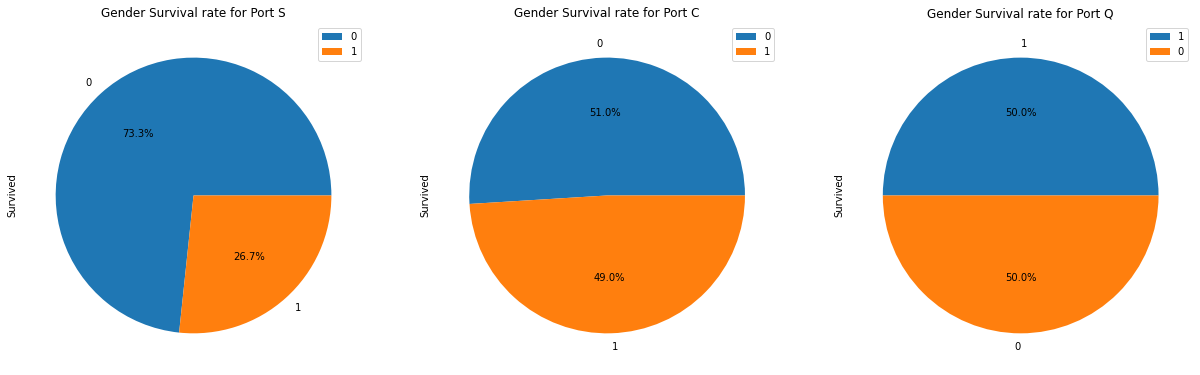

In [37]:
df = test_data[['Embarked', 'Survived']]
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (21, 7))
targets = ['S','C', 'Q']

for i in range(len(ax)):
    temp = ax[i]
    embarked = targets[i]
    df[df['Embarked'] == embarked]['Survived'].value_counts().plot(kind='pie', ax=temp, legend=True, autopct='%0.1f%%')
    
    temp.set_title("Gender Survival rate for Port {}".format(embarked))

## Second Model

In [54]:
class Model2(nn.Module):
    def __init__(self):
        super(Model2, self).__init__()
        self.fc1 = nn.Linear(10, 32)
        self.fc2 = nn.Linear(32,64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32,16)
        self.fc5 = nn.Linear(16,2)
        self.dropout = nn.Dropout(0.2)
        
        fc1 = 1.0/np.sqrt(self.fc1.weight.data.size()[0])
        fc2 = 1.0/np.sqrt(self.fc2.weight.data.size()[0])
        fc3 = 1.0/np.sqrt(self.fc3.weight.data.size()[0])
        fc4 = 1.0/np.sqrt(self.fc4.weight.data.size()[0])
        fc5 = 1.0/np.sqrt(self.fc4.weight.data.size()[0])
        
        T.nn.init.uniform_(self.fc1.weight.data, -fc1,fc1)
        T.nn.init.uniform_(self.fc1.bias.data, -fc1,fc1)
        T.nn.init.uniform_(self.fc2.weight.data,-fc2,fc2)
        T.nn.init.uniform_(self.fc2.bias.data, -fc2,fc2)
        T.nn.init.uniform_(self.fc3.weight.data,-fc3,fc3)
        T.nn.init.uniform_(self.fc3.bias.data, -fc3,fc3)
        T.nn.init.uniform_(self.fc4.weight.data,-fc4,fc4)
        T.nn.init.uniform_(self.fc4.bias.data, -fc4,fc4)
        T.nn.init.uniform_(self.fc5.weight.data,-fc5,fc5)
        T.nn.init.uniform_(self.fc5.bias.data, -fc5,fc5)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = F.relu(self.fc3(x))
        x = self.dropout(x)
        x = F.relu(self.fc4(x))
        x = self.dropout(x)
        x = self.fc5(x)
        return x
    
net2 = Model2()

In [55]:
loss_func2 = nn.CrossEntropyLoss()
optimizer2 = optim.Adam(net2.parameters(), lr=0.001)

In [56]:
from tqdm import tqdm
net2.train()
for epoch in tqdm(range(5)):  # loop over the dataset multiple times
    x = zip(dataloaders, dataloaders_labels)
    for i, data in enumerate(x, 0):
        inputs, labels = data
        optimizer2.zero_grad()
        outputs = net2(inputs)
        loss = loss_func2(outputs, T.tensor(labels, dtype=T.long))
        loss.backward()
        optimizer2.step()
        print('epoch: {}, batch: {}, loss: {}'.format(epoch+1, i+1,loss.item()))

print('Finished Training')

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]<ipython-input-56-bc832e315b7b>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  loss = loss_func2(outputs, T.tensor(labels, dtype=T.long))


epoch: 1, batch: 1, loss: 0.6659864783287048
epoch: 1, batch: 2, loss: 0.6245594024658203
epoch: 1, batch: 3, loss: 0.6645134091377258
epoch: 1, batch: 4, loss: 0.6675535440444946
epoch: 1, batch: 5, loss: 0.7128255367279053
epoch: 1, batch: 6, loss: 0.6682131886482239
epoch: 1, batch: 7, loss: 0.6236873269081116
epoch: 1, batch: 8, loss: 0.7112442255020142
epoch: 1, batch: 9, loss: 0.7522395849227905
epoch: 1, batch: 10, loss: 0.6145053505897522
epoch: 1, batch: 11, loss: 0.6276524662971497
epoch: 1, batch: 12, loss: 0.7565316557884216
epoch: 1, batch: 13, loss: 0.7520368099212646
epoch: 1, batch: 14, loss: 0.6213109493255615
epoch: 1, batch: 15, loss: 0.6207681894302368
epoch: 1, batch: 16, loss: 0.7632951736450195
epoch: 1, batch: 17, loss: 0.713613748550415
epoch: 1, batch: 18, loss: 0.62275630235672
epoch: 1, batch: 19, loss: 0.6184272170066833
epoch: 1, batch: 20, loss: 0.7061929702758789
epoch: 1, batch: 21, loss: 0.6189433336257935
epoch: 1, batch: 22, loss: 0.6230452060699463


 20%|████████████████▊                                                                   | 1/5 [00:00<00:01,  2.04it/s]

epoch: 1, batch: 73, loss: 0.7042962908744812
epoch: 1, batch: 74, loss: 0.6569721102714539
epoch: 1, batch: 75, loss: 0.6638277173042297
epoch: 1, batch: 76, loss: 0.7103966474533081
epoch: 1, batch: 77, loss: 0.6493761539459229
epoch: 1, batch: 78, loss: 0.6921128034591675
epoch: 1, batch: 79, loss: 0.6600697636604309
epoch: 1, batch: 80, loss: 0.6107838749885559
epoch: 1, batch: 81, loss: 0.7223005890846252
epoch: 1, batch: 82, loss: 0.7265845537185669
epoch: 1, batch: 83, loss: 0.6671209931373596
epoch: 1, batch: 84, loss: 0.701485812664032
epoch: 1, batch: 85, loss: 0.595194935798645
epoch: 1, batch: 86, loss: 0.5633956789970398
epoch: 1, batch: 87, loss: 0.6683613657951355
epoch: 1, batch: 88, loss: 0.696472704410553
epoch: 1, batch: 89, loss: 0.6587508320808411
epoch: 1, batch: 90, loss: 0.6589650511741638
epoch: 1, batch: 91, loss: 0.6118184328079224
epoch: 1, batch: 92, loss: 0.5052041411399841
epoch: 1, batch: 93, loss: 0.605674684047699
epoch: 1, batch: 94, loss: 0.593305349

 40%|█████████████████████████████████▌                                                  | 2/5 [00:00<00:01,  2.08it/s]


epoch: 2, batch: 95, loss: 0.35408860445022583
epoch: 3, batch: 1, loss: 0.6222047805786133
epoch: 3, batch: 2, loss: 0.3945424258708954
epoch: 3, batch: 3, loss: 0.3861830532550812
epoch: 3, batch: 4, loss: 0.6009126305580139
epoch: 3, batch: 5, loss: 0.7346198558807373
epoch: 3, batch: 6, loss: 0.3594707250595093
epoch: 3, batch: 7, loss: 0.4362376630306244
epoch: 3, batch: 8, loss: 0.3793635964393616
epoch: 3, batch: 9, loss: 0.5468913316726685
epoch: 3, batch: 10, loss: 0.42892274260520935
epoch: 3, batch: 11, loss: 0.4740076959133148
epoch: 3, batch: 12, loss: 0.7283762693405151
epoch: 3, batch: 13, loss: 0.34601086378097534
epoch: 3, batch: 14, loss: 0.33610886335372925
epoch: 3, batch: 15, loss: 0.4612507224082947
epoch: 3, batch: 16, loss: 0.7457995414733887
epoch: 3, batch: 17, loss: 0.8076542019844055
epoch: 3, batch: 18, loss: 0.2694746255874634
epoch: 3, batch: 19, loss: 0.1906617283821106
epoch: 3, batch: 20, loss: 0.7736526131629944
epoch: 3, batch: 21, loss: 0.710369288

 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:01<00:00,  2.08it/s]

epoch: 3, batch: 78, loss: 0.3932133615016937
epoch: 3, batch: 79, loss: 0.42467719316482544
epoch: 3, batch: 80, loss: 0.7409756183624268
epoch: 3, batch: 81, loss: 0.4384143650531769
epoch: 3, batch: 82, loss: 0.5466355085372925
epoch: 3, batch: 83, loss: 0.5447818636894226
epoch: 3, batch: 84, loss: 0.4855557382106781
epoch: 3, batch: 85, loss: 0.35507750511169434
epoch: 3, batch: 86, loss: 0.33132126927375793
epoch: 3, batch: 87, loss: 0.3031647205352783
epoch: 3, batch: 88, loss: 0.3757244944572449
epoch: 3, batch: 89, loss: 0.537670373916626
epoch: 3, batch: 90, loss: 0.6013203859329224
epoch: 3, batch: 91, loss: 0.4766780436038971
epoch: 3, batch: 92, loss: 0.24754981696605682
epoch: 3, batch: 93, loss: 0.20451919734477997
epoch: 3, batch: 94, loss: 0.22451093792915344
epoch: 3, batch: 95, loss: 0.2600298523902893
epoch: 4, batch: 1, loss: 0.7213631868362427
epoch: 4, batch: 2, loss: 0.33521586656570435
epoch: 4, batch: 3, loss: 0.44893643260002136
epoch: 4, batch: 4, loss: 0.50

 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:01<00:00,  2.14it/s]

epoch: 4, batch: 56, loss: 0.4461424648761749
epoch: 4, batch: 57, loss: 0.22576095163822174
epoch: 4, batch: 58, loss: 0.702560305595398
epoch: 4, batch: 59, loss: 0.5321521759033203
epoch: 4, batch: 60, loss: 0.5492137670516968
epoch: 4, batch: 61, loss: 0.3656168580055237
epoch: 4, batch: 62, loss: 0.5954387187957764
epoch: 4, batch: 63, loss: 0.521735668182373
epoch: 4, batch: 64, loss: 0.4437958002090454
epoch: 4, batch: 65, loss: 0.8060066103935242
epoch: 4, batch: 66, loss: 0.5635753273963928
epoch: 4, batch: 67, loss: 0.21883848309516907
epoch: 4, batch: 68, loss: 0.7102649211883545
epoch: 4, batch: 69, loss: 0.41430842876434326
epoch: 4, batch: 70, loss: 0.5618477463722229
epoch: 4, batch: 71, loss: 0.3292289078235626
epoch: 4, batch: 72, loss: 0.5363050103187561
epoch: 4, batch: 73, loss: 0.4204809069633484
epoch: 4, batch: 74, loss: 0.3460471034049988
epoch: 4, batch: 75, loss: 1.0069688558578491
epoch: 4, batch: 76, loss: 0.7233076691627502
epoch: 4, batch: 77, loss: 0.2995

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:02<00:00,  2.18it/s]

epoch: 5, batch: 89, loss: 0.4231129586696625
epoch: 5, batch: 90, loss: 0.5950971841812134
epoch: 5, batch: 91, loss: 0.37001219391822815
epoch: 5, batch: 92, loss: 0.2534007132053375
epoch: 5, batch: 93, loss: 0.22329072654247284
epoch: 5, batch: 94, loss: 0.19696900248527527
epoch: 5, batch: 95, loss: 0.3105178475379944
Finished Training


In [57]:
correct = 0
total = 0
y = zip(cv_data,cv_labels)
with T.no_grad():
    for i,data in enumerate(y,0):
        inputs,labels = data
        outputs = net2(inputs)
        _, predicted = T.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 79 %
